<H2> Cálculo de campo eléctrico línea circuito sencillo

In [1]:
import pandas as pd
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt

<H3> Parámetros de entrada

In [2]:
V=230; # Tensión, en kV
F=60; # Frecuencia, en Hz
DC=19.55 # Diámetro del cable conductor, en mm
NSub=2; # Número de subconductores
S=457; #Separación entre subconductores, en mm. (Cero si Nsub=1)
FL=13.0; #Flecha promedio de los conductores
X1,X2=(-15,15) #Límites izquierdo y derecho de la servidumbre
NI=121 # Cantidad de intervalos en que desea sea dividido el ancho de servidumbre (Define la resolución de la gráfica obtenida)
H=1 #Altura de la medición del campo eléctrico (generalmente, 1 m)

## Disposición de las fases:

# FaseA_X Distancia desde la fase A hasta el eje de la torre (positiva si está a la derecha del eje de la torre, negativa si lo contrario)
# FaseB_X Distancia desde la fase B hasta el eje de la torre (positiva si está a la derecha del eje de la torre, negativa si lo contrario)
# FaseC_X Distancia desde la fase C hasta el eje de la torre (positiva si está a la derecha del eje de la torre, negativa si lo contrario)
# FaseA_Y Altura de la fase A con respecto al nivel del terreno
# FaseB_Y Altura de la fase B con respecto al nivel del terreno
# FaseC_Y Altura de la fase C con respecto al nivel del terreno

FaseA_X, FaseA_Y = (5.5,30.5)
FaseB_X, FaseB_Y = (-5.5,27.5)
FaseC_X, FaseC_Y = (5.5,24.5)

<H3> Cálculo

In [3]:
if NSub>1:
    Rhaz=S/(2*np.sin(np.pi/NSub))
    Req=((DC/2)*NSub*(Rhaz**(NSub-1)))**(1/NSub)
else:
    Req=DC/2

print(Req)

#Constante equivalente permitividad del aire
e0=1/(36*np.pi)*10**-9

66.83692841536032


In [4]:
#Posición de los conductores (componente X(real),Y(imaginaria))
FaseA=complex(FaseA_X,FaseA_Y-(2/3)*FL)
FaseB=complex(FaseB_X,FaseB_Y-(2/3)*FL)
FaseC=complex(FaseC_X,FaseC_Y-(2/3)*FL)
FaseA_conjug=FaseA.conjugate()
FaseB_conjug=FaseB.conjugate()
FaseC_conjug=FaseC.conjugate()

###Distancias reales entre fases:
DAB=abs(FaseA-FaseB)
DAC=abs(FaseA-FaseC)
DBA=abs(FaseB-FaseA)
DBC=abs(FaseB-FaseC)
DCA=abs(FaseC-FaseA)
DCB=abs(FaseC-FaseB)

###Distancias entre la fase real i y la imagen de la fase j:
DABj=abs(FaseA-FaseB_conjug)
DACj=abs(FaseA-FaseC_conjug)
DBAj=abs(FaseB-FaseA_conjug)
DBCj=abs(FaseB-FaseC_conjug)
DCAj=abs(FaseC-FaseA_conjug)
DCBj=abs(FaseC-FaseB_conjug)
    #print(DABj, DACj, DBAj, DBCj, DCAj, DCBj)
    
#Vector tensiones
U=V/(3**(1/2))*1000
MatrizA=np.array([[1],
                [complex(-0.5,3**(1/2)/2)],
                [complex(-0.5,-3**(1/2)/2)]
                ])
VecTen=U*MatrizA
print(f"La matriz de tensiones es:\n {VecTen}\n")
    
##Matriz de coeficientes Maxwell
P = np.array([[1/(2*np.pi*(e0))*math.log(2*(FaseA_Y-(2/3)*FL)/(Req/1000)), 1/(2*np.pi*(e0))*math.log(DABj/DAB) ,1/(2*np.pi*(e0))*math.log(DACj/DAC)],
            [1/(2*np.pi*(e0))*math.log(DBAj/DBA), 1/(2*np.pi*(e0))*math.log(2*(FaseB_Y-(2/3)*FL)/(Req/1000)), 1/(2*np.pi*(e0))*math.log(DBCj/DBC)],
            [1/(2*np.pi*(e0))*math.log(DCAj/DCA), 1/(2*np.pi*(e0))*math.log(DCBj/DCB), 1/(2*np.pi*(e0))*math.log(2*(FaseC_Y-(2/3)*FL)/(Req/1000))]])
print(f"La matriz P es:\n {P}\n") 
    

La matriz de tensiones es:
 [[132790.56191361     +0.j]
 [-66395.28095681+115000.j]
 [-66395.28095681-115000.j]]

La matriz P es:
 [[1.16677522e+11 2.66294244e+10 3.30662891e+10]
 [2.66294244e+10 1.14016951e+11 2.39127613e+10]
 [3.30662891e+10 2.39127613e+10 1.10893754e+11]]



In [5]:
## Matriz de capacitancias
C=np.linalg.inv(P)
print(f"Matriz Capacitancias:\n {C}\n")

Matriz Capacitancias:
 [[ 9.67818753e-12 -1.73355961e-12 -2.51202199e-12]
 [-1.73355961e-12  9.49658555e-12 -1.53089956e-12]
 [-2.51202199e-12 -1.53089956e-12  1.00967930e-11]]



In [6]:
##Cálculo de la carga en los conductores Q=C*V
Q=np.dot(C,VecTen)
print(f"Matriz de carga Q:\n {Q}\n")

Matriz de carga Q:
 [[ 1.56705854e-06+8.95231743e-08j]
 [-7.59084313e-07+1.26816079e-06j]
 [-9.02307712e-07-1.33718464e-06j]]



El campo eléctrico en los límites de la servidumbre es:
(873.6958245658761, 825.7494110564903) V/m



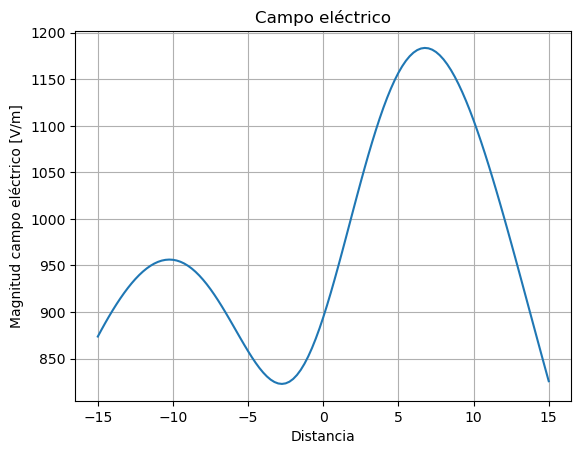

In [7]:
Ancho=np.linspace(X1,X2,num=NI)
Ea_x=(Q[0]/(2*np.pi*e0))*((FaseA_X-Ancho)/((FaseA_X-Ancho)**2+((FaseA_Y-(2/3)*FL)-H)**2)-(FaseA_X-Ancho)/((FaseA_X-Ancho)**2+((FaseA_Y-(2/3)*FL)+H)**2))
Eb_x=(Q[1]/(2*np.pi*e0))*((FaseB_X-Ancho)/((FaseB_X-Ancho)**2+((FaseB_Y-(2/3)*FL)-H)**2)-(FaseB_X-Ancho)/((FaseB_X-Ancho)**2+((FaseB_Y-(2/3)*FL)+H)**2))
Ec_x=(Q[2]/(2*np.pi*e0))*((FaseC_X-Ancho)/((FaseC_X-Ancho)**2+((FaseC_Y-(2/3)*FL)-H)**2)-(FaseC_X-Ancho)/((FaseC_X-Ancho)**2+((FaseC_Y-(2/3)*FL)+H)**2))
Ea_y=(Q[0]/(2*np.pi*e0))*((H-(FaseA_Y-(2/3)*FL))/((FaseA_X-Ancho)**2+((FaseA_Y-(2/3)*FL)-H)**2)-(H+(FaseA_Y-(2/3)*FL))/((FaseA_X-Ancho)**2+((FaseA_Y-(2/3)*FL)+H)**2))
Eb_y=(Q[1]/(2*np.pi*e0))*((H-(FaseB_Y-(2/3)*FL))/((FaseB_X-Ancho)**2+((FaseB_Y-(2/3)*FL)-H)**2)-(H+(FaseB_Y-(2/3)*FL))/((FaseB_X-Ancho)**2+((FaseB_Y-(2/3)*FL)+H)**2))
Ec_y=(Q[2]/(2*np.pi*e0))*((H-(FaseC_Y-(2/3)*FL))/((FaseC_X-Ancho)**2+((FaseC_Y-(2/3)*FL)-H)**2)-(H+(FaseC_Y-(2/3)*FL))/((FaseC_X-Ancho)**2+((FaseC_Y-(2/3)*FL)+H)**2))

Ex=Ea_x+Eb_x+Ec_x
Ey=Ea_y+Eb_y+Ec_y

E_total=(abs(Ex)**2+abs(Ey)**2)**0.5

print(f"El campo eléctrico en los límites de la servidumbre es:\n{E_total[0], E_total[NI-1]} V/m\n")

plt.plot(Ancho, E_total)
plt.xlabel('Distancia') # definir el nombre del eje X
plt.ylabel('Magnitud campo eléctrico [V/m]') # definir el nombre del eje Y
plt.title('Campo eléctrico') # definir el titulo de la grafica
plt.grid(True)
plt.show()